### Exploratory data analysis

- Learn about the dataset.
- Figure out which features are continuous, which ones are categorical.
- Check if there are obvious relationships between the features.
- Take a look at the distribution of each feature.

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import helpers as hlp

#### Load the data

In [95]:
class_labels, features, ids = hlp.load_csv_data("../data/")

In [96]:
print("Number of data points =", features.shape[0])
print("Number of features =", features.shape[1])

Number of data points = 328135
Number of features = 319


#### Continuous vs. categorical features

We will count the number of unique values for each feature.

In [87]:
feature_unique_els = {}
for i in range(len(features.T)):
    # get unique elements
    unique_els = np.unique(features.T[i])
    # remove nans
    unique_els = unique_els[~np.isnan(unique_els)]
    # store the number of unique elements in a dictionary
    feature_unique_els[i] = len(unique_els)

In [88]:
print("{:<28} {:<50}".format("FEATURE", "NUMBER OF UNIQUE VALUES"))
# print the frist 10
for key, value in list(feature_unique_els.items())[:10]:
    print("Feature {:<20} {:<50}".format(key, value))

FEATURE                      NUMBER OF UNIQUE VALUES                           
Feature 0                    414                                               
Feature 1                    12                                                
Feature 2                    31                                                
Feature 3                    2                                                 
Feature 4                    2                                                 
Feature 5                    21780                                             
Feature 6                    21780                                             
Feature 7                    1                                                 
Feature 8                    2                                                 
Feature 9                    1                                                 


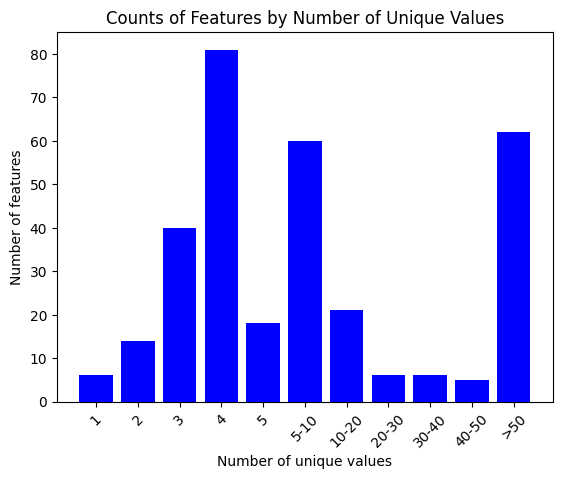

In [6]:
data = np.array(list(feature_unique_els.values()))
# define the intervals
intervals = [1, 2, 3, 4, 5, [5, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, np.max(data)]]
# initialize a dictionary to store the counts
counts = {}
# count elements in the intervals
for i, interval in enumerate(intervals):
    if isinstance(interval, int):
        counts[f'{interval}'] = np.sum(data == interval)
    elif isinstance(interval, list):
        lower, upper = interval
        if lower != 50:
            counts[f'{lower}-{upper}'] = np.sum((data > lower) & (data <= upper))
        else:
            counts[f'>50'] = np.sum((data > lower) & (data <= upper))
            
# plot the counts
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel('Number of unique values')
plt.ylabel('Number of features')
plt.title('Counts of Features by Number of Unique Values')
plt.xticks(rotation=45)
plt.show()

#### Missing values

We will check for missing values in the dataset. We will also check the percentage of missing values for each feature. 

In [60]:
feature_nans = {}
for i in range(len(features.T)):
    # store the number of missing elements in a dictionary
    feature_nans[i] = np.sum(np.isnan(features.T[i]))

In [62]:
print("{:<28} {:<50}".format("FEATURE", "NUMBER OF MISSING VALUES"))
# print the frist 10
for key, value in list(feature_nans.items())[:10]:
    print("Feature {:<20} {:<50}".format(key, value))

FEATURE                      NUMBER OF MISSING VALUES                          
Feature 0                    0                                                 
Feature 1                    0                                                 
Feature 2                    0                                                 
Feature 3                    0                                                 
Feature 4                    0                                                 
Feature 5                    0                                                 
Feature 6                    0                                                 
Feature 7                    139415                                            
Feature 8                    139415                                            
Feature 9                    328103                                            


In [147]:
# percentage of missing values per feature
print("{:<28} {:<50}".format("FEATURE", "PERCENTAGE OF MISSING VALUES"))
for feature in list(feature_nans.keys())[:10]:
    print("Feature {:<20} {:<50.6f}".format(feature, (feature_nans[feature] / features.shape[0])))

FEATURE                      PERCENTAGE OF MISSING VALUES                      
Feature 0                    0.000000                                          
Feature 1                    0.000000                                          
Feature 2                    0.000000                                          
Feature 3                    0.000000                                          
Feature 4                    0.000000                                          
Feature 5                    0.000000                                          
Feature 6                    0.000000                                          
Feature 7                    0.424871                                          
Feature 8                    0.424871                                          
Feature 9                    0.999902                                          


We will list the features that have more than X % (threshold) missing values.

In [84]:
# threshold for missing values
threshold = 0.5
# features to remove
features_to_remove = []
for feature in feature_nans.keys():
    if (feature_nans[feature] / features.shape[0]) >= threshold:
        features_to_remove.append(feature)
print(f"Number of features with more than {threshold*100}% missing values =", len(features_to_remove))

Number of features with more than 50.0% missing values = 147


#### Correlation of features

Identify relationships between features.

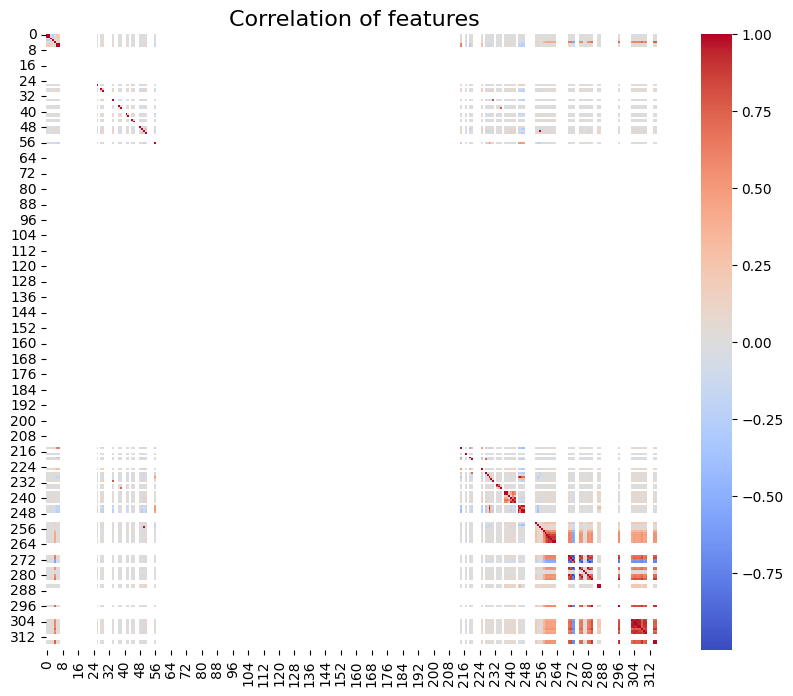

In [127]:
correlation_matrix = np.corrcoef(features, rowvar=False)
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Correlation of features', y=1, size=16)
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm')
plt.show()

#### Distribution of features

First we will describe the features.

In [170]:
def describe(matrix, num_rows):
    # calculate the basic statistics for each feature
    count = np.count_nonzero(~np.isnan(matrix), axis=0)
    mean = np.nanmean(matrix, axis=0)
    std = np.nanstd(matrix, axis=0)
    min_val = np.nanmin(matrix, axis=0)
    max_val = np.nanmax(matrix, axis=0)
    # create a dictionary to store the statistics
    description = {
        "count": count,
        "mean": mean,
        "std": std,
        "min": min_val,
        "25%": np.nanpercentile(matrix, 25, axis=0),
        "50%": np.nanpercentile(matrix, 50, axis=0),
        "75%": np.nanpercentile(matrix, 75, axis=0),
        "max": max_val,
    }
    # print the table
    print("{:<12} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20}".format("FEATURE", "COUNT", "MEAN", "STD", "MIN", "25%", "50%", "75%", "MAX"))
    for i in range(min(matrix.shape[1], num_rows)):
        print("{:<12} {:<20} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f}".format(f"Feature {i}", count[i], mean[i], std[i], min_val[i], description["25%"][i], description["50%"][i], description["75%"][i], max_val[i]))

In [171]:
# describe the first 10 features
describe(features, 10)

FEATURE      COUNT                MEAN                 STD                  MIN                  25%                  50%                  75%                  MAX                 
Feature 0    328135               6563638.198          3489242.352          1012016.000          3232015.000          6242015.000          10022015.000         12312015.000        
Feature 1    328135               6.417                3.493                1.000                3.000                6.000                10.000               12.000              
Feature 2    328135               14.496               8.334                1.000                8.000                14.000               21.000               31.000              
Feature 3    328135               2015.025             0.155                2015.000             2015.000             2015.000             2015.000             2016.000            
Feature 4    328135               1115.015             35.722               1100.000           

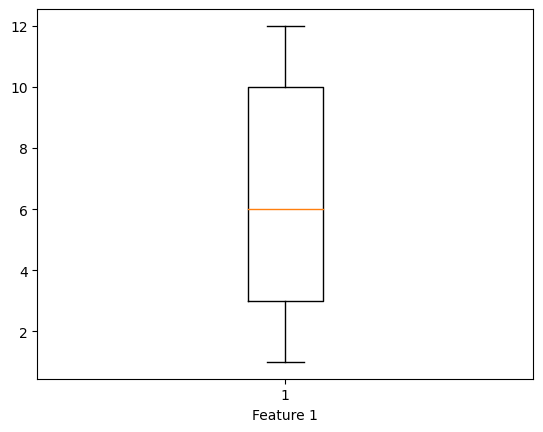

In [140]:
# choose feature index
index = 1
# get the feature
feature = features.T[index]
# plot the feature
fig, ax = plt.subplots()
ax.boxplot(feature)
ax.set_xlabel(f"Feature {index}")
plt.show()